In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv('../data/processed/qs_wur.csv')


In [5]:
df.columns


Index(['Unnamed: 0', 'Year', 'Rank', 'O_Rank', 'Institution ',
       'Academic Reputation', 'AR Rank', 'Employer Reputation', 'ER Rank',
       'Faculty Student', 'FS Rank', 'Citations per Faculty', 'CF Rank',
       'International Faculty', 'IF Rank', 'International Students', 'IS Rank',
       'Overall Score'],
      dtype='object')

In [6]:
X = df[['Academic Reputation', 'AR Rank', 'Employer Reputation', 'ER Rank',
       'Faculty Student', 'FS Rank', 'Citations per Faculty', 'CF Rank',
        'International Faculty', 'IF Rank', 'International Students', 'IS Rank']].values

Y = df['Overall Score'].values


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)


In [8]:
modelo = LinearRegression()


In [9]:
modelo.fit(X_train, Y_train)


LinearRegression()

In [10]:
columnas = ['Academic Reputation', 'AR Rank', 'Employer Reputation', 'ER Rank',
            'Faculty Student', 'FS Rank', 'Citations per Faculty', 'CF Rank',
            'International Faculty', 'IF Rank', 'International Students', 'IS Rank']

coeff = pd.DataFrame(modelo.coef_, columnas, columns=['Coeffs'])


In [11]:
coeff


,Coeffs
Academic Reputation,0.380216
AR Rank,-0.005550
Employer Reputation,0.072658
ER Rank,-0.006151
Faculty Student,0.196711
FS Rank,-0.000758
Citations per Faculty,0.193208
CF Rank,-0.000958
International Faculty,0.002998
IF Rank,-0.009959


In [12]:
Y_pred = modelo.predict(X_test)


In [13]:
validacion = pd.DataFrame(
    {"Actual": Y_test, "Prediccion": Y_pred, "Diferencia": Y_test-Y_pred})


In [14]:
validacion
muestra = validacion.sample(30)


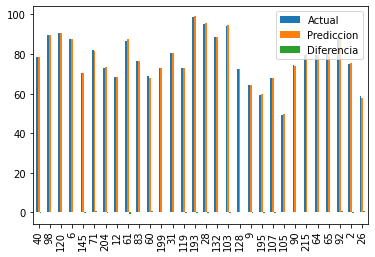

In [20]:
muestra.plot.bar()
plt.savefig('../data/img/diferencia.jpg',dpi=500)
